# Image Classification using Logistic Regression and Softmax Regression
### Fashion-MNIST Dataset

## 1. Install Required Libraries
Before starting, you need to install the necessary Python libraries:
- **TensorFlow**: Used for building and training the Softmax Regression model.
- **Scikit-Learn**: Provides the Logistic Regression implementation.
- **Matplotlib**: Used for plotting images and confusion matrices.
```bash
pip install tensorflow scikit-learn matplotlib
```


## 2. Import Necessary Libraries
In this step, we import the necessary libraries to handle data processing, model training, and evaluation.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

## 3. Load and Preprocess the Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training images and 10,000 test images, categorized into 10 classes.


In [20]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for Logistic Regression
train_images_flattened = train_images.reshape((train_images.shape[0], 28 * 28))
test_images_flattened = test_images.reshape((test_images.shape[0], 28 * 28))

## 4. Logistic Regression for Image Classification
Logistic Regression is used for multi-class classification. We fit the model using the flattened images.

In [24]:
logistic_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100)

logistic_model.fit(train_images_flattened, train_labels)

test_predictions = logistic_model.predict(test_images_flattened)

c:\Users\wwwwe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\wwwwe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8439

In [29]:
train_predictions = logistic_model.predict(train_images_flattened)
test_predictions = logistic_model.predict(test_images_flattened)

In [30]:
accuracy_score(train_labels, train_predictions)

0.8793

In [28]:
accuracy_score(test_labels, test_predictions)

0.8439

## 5. Softmax Regression (Using TensorFlow/Keras)
Softmax Regression is implemented using a simple neural network in TensorFlow/Keras.

In [22]:
model = models.Sequential([
    layers.InputLayer(input_shape=(28 * 28,)),  
    layers.Dense(10, activation='softmax')    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images_flattened, train_labels, epochs=10, validation_data=(test_images_flattened, test_labels))

test_loss, test_accuracy = model.evaluate(test_images_flattened, test_labels, verbose=2)


c:\Users\wwwwe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7419 - loss: 0.7770 - val_accuracy: 0.8229 - val_loss: 0.5134
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8369 - loss: 0.4728 - val_accuracy: 0.8375 - val_loss: 0.4707
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8487 - loss: 0.4352 - val_accuracy: 0.8382 - val_loss: 0.4656
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8529 - loss: 0.4256 - val_accuracy: 0.8378 - val_loss: 0.4655
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8583 - loss: 0.4115 - val_accuracy: 0.8369 - val_loss: 0.4651
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8620 - loss: 0.4036 - val_accuracy: 0.8391 - val_loss: 0.4602
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8607 - loss: 0.4052 - val_accuracy: 0.8438 - val_loss: 0.4492
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8619 - loss: 0.3972 - 

## 6. Visualize Model Predictions
We visualize the predictions made by the Softmax Regression model on the test dataset.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


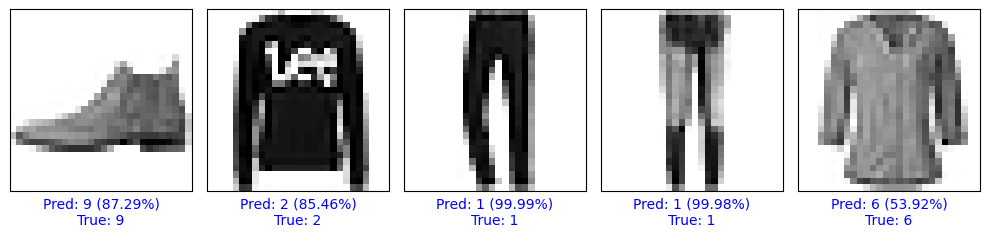

In [23]:
# Predict on the test images
predictions = model.predict(test_images_flattened)

# Function to plot the image, predicted label, and true label
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"Pred: {predicted_label} ({100*np.max(predictions_array):.2f}%)\nTrue: {true_label}", color=color)

# Plot a few test images with their predictions
num_images = 5
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()


### Summary
- **Logistic Regression**: You flattened the images and used `LogisticRegression` from Scikit-Learn to classify the Fashion-MNIST dataset.
- **Softmax Regression**: You used TensorFlow/Keras to build a simple neural network with a softmax activation function to classify the same dataset.